In [5]:
from openseespy.opensees import *

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Start of model generation
# -----------------------------

# remove existing model
wipe()

# set modelbuilder
model('basic', '-ndm', 2, '-ndf', 2)

# create nodes
node(1, 0.0, 0.0)
node(2, 144.0,  0.0)
node(3, 168.0,  0.0)
node(4,  72.0, 96.0)

# set boundary condition
fix(1, 1, 1)
fix(2, 1, 1)
fix(3, 1, 1)

# define materials
uniaxialMaterial("Elastic", 1, 3000.0)

# define elements
element("Truss",1,1,4,10.0,1)
element("Truss",2,2,4,5.0,1)
element("Truss",3,3,4,5.0,1)

# create TimeSeries
timeSeries("Linear", 1)

# create a plain load pattern
pattern("Plain", 1, 1)

# Create the nodal load - command: load nodeID xForce yForce
load(4, 100.0, -50.0)

# ------------------------------
# Start of analysis generation
# ------------------------------

# create SOE
system("BandSPD")

# create DOF number
numberer("RCM")

# create constraint handler
constraints("Plain")

# create integrator
integrator("LoadControl", 1.0)

# create algorithm
algorithm("Linear")

# create analysis object
analysis("Static")

# perform the analysis
analyze(1)

ux = nodeDisp(4,1)
uy = nodeDisp(4,2)
if abs(ux-0.53009277713228375450)<1e-12 and abs(uy+0.17789363846931768864)<1e-12:
    print("Passed!")
else:
    print("Failed!")

Passed!


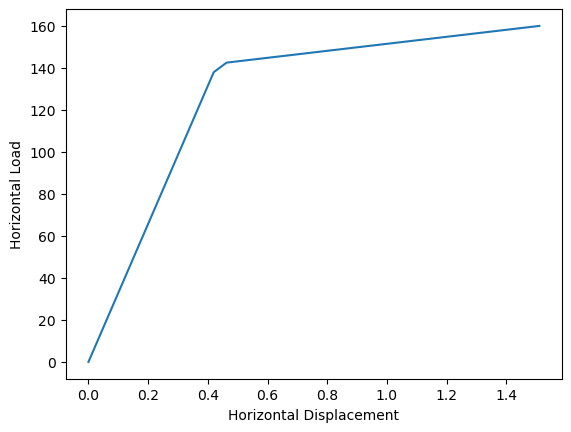

In [7]:
from openseespy.opensees import *

import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Start of model generation
# -----------------------------

# set modelbuilder
wipe()
model('basic', '-ndm', 2, '-ndf', 2)

# variables
A = 4.0
E = 29000.0
alpha = 0.05
sY = 36.0
udisp = 2.5
Nsteps = 1000
Px = 160.0
Py = 0.0

# create nodes
node(1, 0.0, 0.0)
node(2, 72.0, 0.0)
node(3, 168.0, 0.0)
node(4, 48.0, 144.0)

# set boundary condition
fix(1, 1, 1)
fix(2, 1, 1)
fix(3, 1, 1)

# define materials
uniaxialMaterial("Hardening", 1, E, sY, 0.0, alpha/(1-alpha)*E)

# define elements
element("Truss",1,1,4,A,1)
element("Truss",2,2,4,A,1)
element("Truss",3,3,4,A,1)

# create TimeSeries
timeSeries("Linear", 1)

# create a plain load pattern
pattern("Plain", 1, 1)

# Create the nodal load
load(4, Px, Py)

# ------------------------------
# Start of analysis generation
# ------------------------------

# create SOE
system("ProfileSPD")

# create DOF number
numberer("Plain")

# create constraint handler
constraints("Plain")

# create integrator
integrator("LoadControl", 1.0/Nsteps)

# create algorithm
algorithm("Newton")

# create test
test('NormUnbalance',1e-8, 10)

# create analysis object
analysis("Static")

# ------------------------------
# Finally perform the analysis
# ------------------------------

# perform the analysis
data = np.zeros((Nsteps+1,2))
for j in range(Nsteps):
    analyze(1)
    data[j+1,0] = nodeDisp(4,1)
    data[j+1,1] = getLoadFactor(1)*Px

plt.plot(data[:,0], data[:,1])
plt.xlabel('Horizontal Displacement')
plt.ylabel('Horizontal Load')
plt.show()